In [2]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 400
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.1, pzNode2 = -0.6314028, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     EnergyNode2 = 0.049189807,
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-3), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

pzMin = -1
pzMax = 1
pzCount = 30

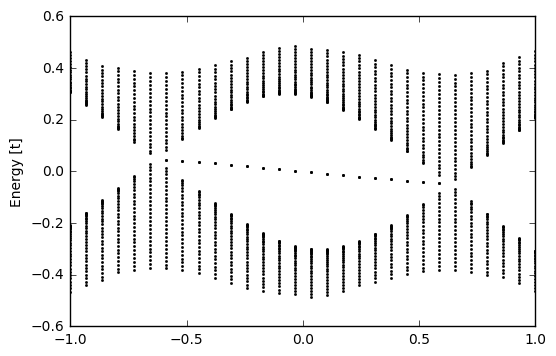

In [43]:
params = copy(ParametersDefault)

evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

## Extraction of the z-velocity of the Fermi arcs

### Extraction of the velocity for $p^z$ around a Weyl node

In [36]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.01
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.04851469 - params.EnergyNode2)/0.01)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04799216  0.04877692  0.04956169  0.05034646] while the expected Weyl-node energy is 0.049189807
[ 0.04851469  0.04851469  0.05599382  0.05613517]
[ 0.0457664   0.0457664   0.08269881  0.08272654]
-0.06751170000000029
-0.06846814000000007


### Extraction of the velocity for $p^z$ in between the Weyl nodes (TO REVISE: maybe it is better to Taylor-expand around $p^z=0$ instead?)

In [43]:
params = copy(ParametersDefault)

#If I make 8000 sites instead of 7000, the numerical error appears somehow 
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(7000)
params.pz = 0.
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params.pz = 0.05
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((-0.00416493)/0.05)


del fsys_finerResolution, params, evals, evecs

[ -2.95881015e-01   5.08635444e-19   9.20209656e-18   2.95910607e-01]
[-0.00416493 -0.00416493  0.2849755   0.28503678]
-0.08329859999999999


### The FA spectrum is odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [76]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = 0.3
params.py = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = -0.3
params.py = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = 0.3
params.py = 0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = -0.3
params.py = -0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.22359902  0.17434565  0.2524964   0.25270577]
[-0.25270629 -0.25249908 -0.17434565  0.22359902]
[-0.42058329  0.37132993  0.4149784   0.41511229  0.41533535  0.4156474
  0.41604823  0.41653755  0.41711503  0.41778026  0.41853279  0.41937212
  0.42029765  0.42130882  0.42240559]
[-0.42240524 -0.4213089  -0.42029771 -0.41937223 -0.4185328  -0.41778026
 -0.41711503 -0.41653755 -0.41604823 -0.4156474  -0.41533535 -0.41511229
 -0.4149784  -0.37132993  0.42058329]


### Somehow the FA spectrum is additively separable wrt $p^z$ and $p^y$, even at the level of the microscopic theory!

In [140]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 4
params.pz = -0.1
params.py = 0.05
params.FermiEnergy = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(-0.09961066+0.00831945)

params.FermiEnergy = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.09961066+0.00831945)


del fsys_finerResolution, params, evals, evecs

[-0.26941774 -0.26919804  0.00831945  0.00831945]
[-0.31331972 -0.09961066  0.09961066  0.31331672]
[-0.28761516 -0.28727505 -0.28707223 -0.0912912 ]
-0.09129121
[-0.0912912   0.10793011  0.31887111  0.31907523]
0.10793011000000001


## Deformation of the boundary condition

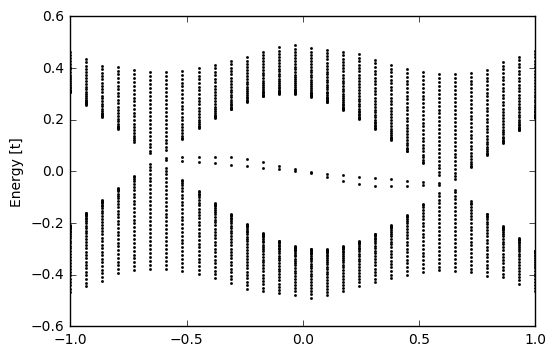

In [34]:
params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

### Extraction of the velocity for $p^z$ around a Weyl node

In [33]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.05115345 - params.EnergyNode2)/0.05)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04801043  0.04879544  0.04958045  0.05036546] while the expected Weyl-node energy is 0.049189807
[ 0.0457664   0.05115345  0.08269878  0.08272627  0.08277205  0.08283619]
0.03927286000000002
-0.06846814000000007


### Extraction of the velocity for $p^z$ in between the Weyl nodes

In [47]:
params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

#If I make 8000 sites instead of 7000, the numerical error appears somehow 
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(7000)
params.pz = 0.
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params.pz = 0.05
params.FermiEnergy = 0.
params.EigenvectorsCount = 6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((-0.00416493)/0.05)
print((-0.01127262)/0.05)


del fsys_finerResolution, params, evals, evecs

[ -2.95902032e-01   5.63739959e-20   9.20209656e-18   2.95894130e-01]
[-0.01127262 -0.00416493  0.28496814  0.28499358  0.28506003  0.2851316 ]
-0.08329859999999999
-0.2254524


### The FA spectrum is still odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [133]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.


params.EigenvectorsCount = 10
params.FermiEnergy = -0.0
params.pz = 0.2
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.0
params.pz = -0.2
params.py = -0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.11616643  0.2004221   0.24521216  0.24543743  0.24581242  0.24633645
  0.24700864  0.24782753  0.24879197  0.2499001 ]
[-0.24990088 -0.24879267 -0.2478276  -0.24700868 -0.24633646 -0.24581243
 -0.24543743 -0.24521216 -0.2004221   0.11616643]


### But the FA spectrum is no longer separable!

In [141]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(4000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

params.EigenvectorsCount = 4
params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 6
params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = -0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.00831945-0.09961066)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.02222189+0.26900809)


del params, evals, evecs

[-0.26933153 -0.26915217  0.00831945  0.02222189]
[-0.31328744 -0.31325042 -0.09961066  0.26900809  0.31324635  0.3133384 ]
[-0.28742196 -0.28730343 -0.28724711 -0.2871637  -0.28712018 -0.28708347
 -0.28704846 -0.28702174 -0.28700892 -0.0912912 ]
-0.09129121
[-0.0912912   0.28603829  0.31880807  0.31882627  0.31886188  0.31890606
  0.31896155  0.31903856  0.31915258  0.31931416]
0.29122998


### Let us extract both $\mathcal{O}(p)$ and $\mathcal{O}(p^3)$ terms in the dispersion relation

In [3]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.
params.EigenvectorsCount = 6


params.FermiEnergy = 0.
params.py = 0.
params.pz = -0.001
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
Coeff10 = 2.26489015e-04/(-0.001)
print(Coeff10)

params.FermiEnergy = 0.01
params.py = 0.
params.pz = -0.5
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
Coeff30 = (0.05482147 - Coeff10*(-0.5)) / (-0.5)**3
print(Coeff30)


params.FermiEnergy = 0.
params.py = 0.001
params.pz = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
Coeff01 = 0.00541683/(0.001)
print(Coeff01)

params.FermiEnergy = 0.
params.py = 0.05
params.pz = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
Coeff03 = (0.26900809 - Coeff01*0.05)/0.05**3
print(Coeff03)


params.FermiEnergy = 0.05
params.py = 0.03
params.pz = -0.5
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
tempVar1 = (0.13345268 - Coeff10*(-0.5) - Coeff30*(-0.5**3) - Coeff01*0.03 - Coeff03*(0.03**3))/(0.03*(-0.5))

params.FermiEnergy = -0.05
params.py = 0.03
params.pz = 0.5
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
tempVar2 = (0.02656023 - Coeff10*(0.5) - Coeff30*(0.5**3) - Coeff01*0.03 - Coeff03*(0.03**3))/(0.03*(0.5))

Coeff12 = (tempVar1 + tempVar2) / (2.*0.03)
Coeff21 = (tempVar1 - tempVar2) / (2.*(-0.5))
print(Coeff12, Coeff21)

print(Coeff10*(-0.5) + Coeff30*(-0.5**3) + Coeff01*0.03 + Coeff03*(0.03**3) + 0.03*(-0.5)*(Coeff21*(-0.5) + Coeff12*0.03) )
print(Coeff10*(0.5) + Coeff30*(0.5**3) + Coeff01*0.03 + Coeff03*(0.03**3) + 0.03*(0.5)*(Coeff21*(0.5) + Coeff12*0.03) )

params.FermiEnergy = 0.05
params.py = 0.02
params.pz = -0.3
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

print(Coeff10*(-0.3) + Coeff30*(-0.3**3) + Coeff01*0.02 + Coeff03*(0.02**3) + 0.02*(-0.3)*(Coeff21*(-0.3) + Coeff12*0.02) )


del params, evals, evecs, Coeff10, Coeff30, Coeff01, Coeff03, Coeff21, Coeff12, tempVar1, tempVar2

[ -2.95915142e-01  -2.95788267e-01  -2.95734119e-01  -2.95704139e-01
   8.33333194e-05   2.26489015e-04]
-0.226489015
[-0.04168578 -0.04164177 -0.04161042 -0.04159158  0.03995213  0.05482147]
0.4673843
[-0.29593699 -0.29588431 -0.00199304  0.00541683  0.29587709  0.29597505]
5.41683
[-0.31330157 -0.31324673 -0.09961066  0.26900809  0.31324707  0.31328699]
-14.667280000000279
[-0.01983021  0.13345268  0.15386421  0.15388538  0.15391181  0.15397443]
[-0.15398818 -0.15391168 -0.15388549 -0.15386365 -0.09973446  0.02656023]
3.056100000000006 -10.946990458666669
0.13345267999999996
0.02656022999999999
[-0.01523153  0.14097513  0.24971497  0.24975238  0.24982693  0.24997697]
0.14347527533439997
